In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

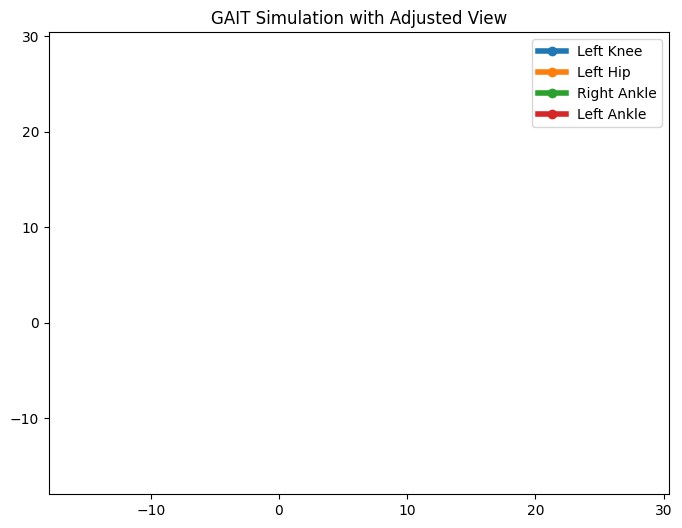

In [3]:
# Load the dataset
file_path = './Kavya.csv'
gait_data = pd.read_csv(file_path)

# Choose Left Hip (LH) as the reference joint for global origin
reference_joint_x = gait_data['X (m/s2)_LH']
reference_joint_y = gait_data['Y (m/s2)_LH']

# Transform coordinates relative to the reference joint
transformed_data = pd.DataFrame({
    'LK_X': gait_data['X (m/s2)_LK'] - reference_joint_x,
    'LK_Y': gait_data['Y (m/s2)_LK'] - reference_joint_y,
    'LH_X': gait_data['X (m/s2)_LH'] - reference_joint_x,
    'LH_Y': gait_data['Y (m/s2)_LH'] - reference_joint_y,
    'RA_X': gait_data['X (m/s2)_RA'] - reference_joint_x,
    'RA_Y': gait_data['Y (m/s2)_RA'] - reference_joint_y,
    'LA_X': gait_data['X (m/s2)_LA'] - reference_joint_x,
    'LA_Y': gait_data['Y (m/s2)_LA'] - reference_joint_y,
})

# Create figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(transformed_data.min().min() - 1, transformed_data.max().max() + 1)
ax.set_ylim(transformed_data.min().min() - 1, transformed_data.max().max() + 1)

# Initialize stickman lines
lk_line, = ax.plot([], [], 'o-', lw=4, label="Left Knee")
lh_line, = ax.plot([], [], 'o-', lw=4, label="Left Hip")
ra_line, = ax.plot([], [], 'o-', lw=4, label="Right Ankle")
la_line, = ax.plot([], [], 'o-', lw=4, label="Left Ankle")

# Initialize function
def init():
    lk_line.set_data([], [])
    lh_line.set_data([], [])
    ra_line.set_data([], [])
    la_line.set_data([], [])
    return lk_line, lh_line, ra_line, la_line

# Update function for each frame
def update(frame):
    lk_line.set_data([transformed_data['LH_X'][frame], transformed_data['LK_X'][frame]], 
                     [transformed_data['LH_Y'][frame], transformed_data['LK_Y'][frame]])
    ra_line.set_data([transformed_data['LH_X'][frame], transformed_data['RA_X'][frame]], 
                     [transformed_data['LH_Y'][frame], transformed_data['RA_Y'][frame]])
    la_line.set_data([transformed_data['LH_X'][frame], transformed_data['LA_X'][frame]], 
                     [transformed_data['LH_Y'][frame], transformed_data['LA_Y'][frame]])
    return lk_line, lh_line, ra_line, la_line

# Create the animation with adjusted limits
ani = FuncAnimation(fig, update, frames=len(transformed_data), init_func=init, blit=True, interval=100)

plt.title("GAIT Simulation with Adjusted View")
plt.legend()
plt.show()
